In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

In [3]:
def plot_loss(csv_filepath):
    data = pd.read_csv(csv_filepath, sep=';')
    
    fig, (p1, p2) = plt.subplots(1, 2, figsize=(15,5))

    sns.lineplot(data=data, x='epoch', y='train_entropy', ax=p1)
    sns.lineplot(data=data, x='epoch', y='val_entropy', ax=p1)
    p1.legend(labels=['train loss', 'val loss'])
    p1.set_title("Loss")

    sns.lineplot(data=data, x='epoch', y='val_acc', ax=p2)
    sns.lineplot(data=data, x='epoch', y='val_auroc', ax=p2)
    sns.lineplot(data=data, x='epoch', y='val_auprc', ax=p2)
    p2.legend(labels=['acc', 'auroc', 'auprc'])
    p2.set_title("Metrics")
    
    p = data.iloc[data['val_entropy'].idxmin()][["epoch", "train_entropy", "val_entropy", "val_acc", "val_auroc", "val_auprc"]]
    #p = data.iloc[data['val_auprc'].idxmax()][["epoch", "train_entropy", "val_entropy", "val_acc", "val_auroc", "val_auprc"]]
    #p = data.iloc[data['val_auroc'].idxmax()][["epoch", "train_entropy", "val_entropy", "val_acc", "val_auroc", "val_auprc"]]
    print(p)
    print("Select model at epoch %d" % (p["epoch"] + 1))

    plt.show()

# Full models

### Baseline LSTM

epoch            56.000000
train_entropy     0.249368
val_entropy       0.279520
val_acc           0.886716
val_auroc         0.863429
val_auprc         0.555176
Name: 56, dtype: float64
Select model at epoch 57


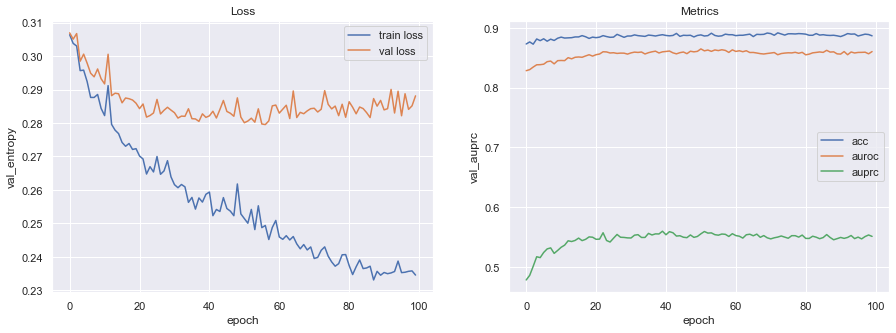

In [4]:
plot_loss("training_logs/k_lstm.n16.d0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2757  105] \
 [ 238  136]] \
entropy = 0.26587815453112473 \
accuracy = 0.8940049409866333 \
precision class 0 = 0.9205342531204224 \
precision class 1 = 0.5643153786659241 \
recall class 0 = 0.9633123874664307 \
recall class 1 = 0.3636363744735718 \
AUC of ROC = 0.8539716439272488 \
AUC of PRC = 0.4781193222878521 \
min(+P, Se) = 0.4786096256684492

### 0.3 dropout

epoch            68.000000
train_entropy     0.289284
val_entropy       0.292824
val_acc           0.883302
val_auroc         0.846445
val_auprc         0.527162
Name: 68, dtype: float64
Select model at epoch 69


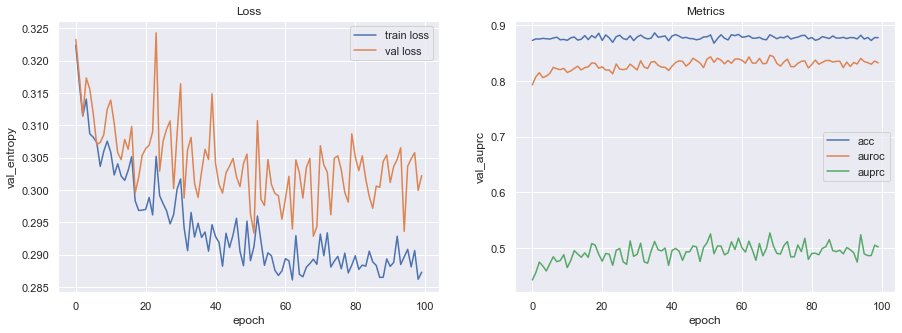

In [5]:
plot_loss("training_logs/k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2843   19] \
 [ 305   69]] \
entropy = 0.26438881113908824 \
accuracy = 0.8998764157295227 \
precision class 0 = 0.903113067150116 \
precision class 1 = 0.7840909361839294 \
recall class 0 = 0.9933612942695618 \
recall class 1 = 0.18449197709560394 \
AUC of ROC = 0.8525758883694512 \
AUC of PRC = 0.5099098118943177 \
min(+P, Se) = 0.47058823529411764 \
Epistemic uncertainty = 0.00303400750271976 \
Aleatoric uncertainty = 0.0835852101445198 \
Uncertainty = 0.08661922067403793

### 0.5 dropout

epoch            73.000000
train_entropy     0.312713
val_entropy       0.311563
val_acc           0.877716
val_auroc         0.815090
val_auprc         0.467840
Name: 73, dtype: float64
Select model at epoch 74


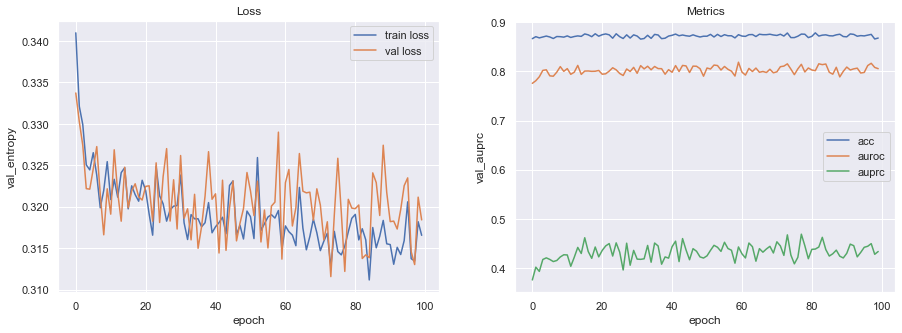

In [6]:
plot_loss("training_logs/k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2830   32] \
 [ 304   70]] \
entropy = 0.274401043504891 \
accuracy = 0.8961681127548218 \
precision class 0 = 0.9029993414878845 \
precision class 1 = 0.686274528503418 \
recall class 0 = 0.9888190031051636 \
recall class 1 = 0.1871657818555832 \
AUC of ROC = 0.8386127273474665 \
AUC of PRC = 0.4632016589973929 \
min(+P, Se) = 0.4656084656084656 \
Epistemic uncertainty = 0.005050228908658028 \
Aleatoric uncertainty = 0.08416983485221863 \
Uncertainty = 0.0892200618982315

### Concrete dropout

epoch            10.000000
train_entropy     0.255627
val_entropy       0.288171
val_acc           0.887647
val_auroc         0.852165
val_auprc         0.545930
Name: 10, dtype: float64
Select model at epoch 11


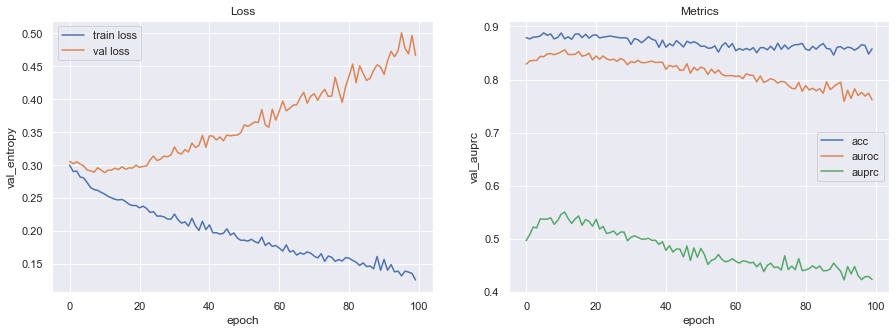

In [7]:
plot_loss("training_logs/k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

forward_stochastic_lstm_1 dropout = 0.32619372 \
forward_stochastic_lstm_1 recurrent_dropout = 0.35272005 \
backward_stochastic_lstm_1 dropout = 0.3854713 \
backward_stochastic_lstm_1 recurrent_dropout = 0.4355017 \
stochastic_lstm_2 dropout = 0.30197388 \
stochastic_lstm_2 recurrent_dropout = 0.43366364

confusion matrix: \
[[2764   98] \
 [ 238  136]] \
entropy = 0.2669386616446094 \
accuracy = 0.8961681127548218 \
precision class 0 = 0.9207195043563843 \
precision class 1 = 0.5811966061592102 \
recall class 0 = 0.965758204460144 \
recall class 1 = 0.3636363744735718 \
AUC of ROC = 0.8500852027489098 \
AUC of PRC = 0.4863947293394888 \
min(+P, Se) = 0.4946524064171123 \
Epistemic uncertainty = 1.384819062375282e-16 \
Aleatoric uncertainty = 0.0782242938876152 \
Uncertainty = 0.0782242938876152

# Channel-wise Full models

### Baseline mode

epoch            17.000000
train_entropy     0.265587
val_entropy       0.278306
val_acc           0.885165
val_auroc         0.864554
val_auprc         0.559507
Name: 17, dtype: float64
Select model at epoch 18


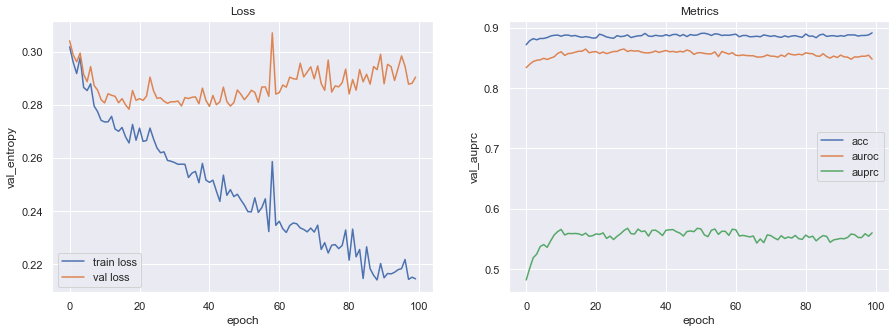

In [8]:
plot_loss("training_logs/k_channel_wise_lstms.n8.szc4.0.d0.3.dep1.bs8.ts1.0.csv")

confusion matrix: \
[[2807   55] \
 [ 273  101]] \
entropy = 0.2595379542951082 \
accuracy = 0.8986402750015259 \
precision class 0 = 0.9113636612892151 \
precision class 1 = 0.6474359035491943 \
recall class 0 = 0.980782687664032 \
recall class 1 = 0.2700534760951996 \
AUC of ROC = 0.8579085341016529 \
AUC of PRC = 0.5004313835350334 \
min(+P, Se) = 0.4786096256684492

### 0.3 dropout

epoch            72.000000
train_entropy     0.294920
val_entropy       0.290423
val_acc           0.884233
val_auroc         0.846314
val_auprc         0.531245
Name: 72, dtype: float64
Select model at epoch 73


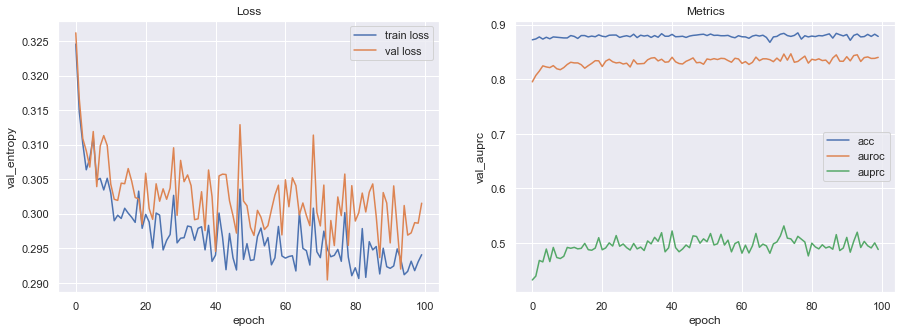

In [9]:
plot_loss("training_logs/k_channel_wise_lstms_stochastic.n8.szc4.0.d0.3.rd0.3.dep1.bs8.ts1.0.csv")

confusion matrix: \
[[2816   46] \
 [ 284   90]] \
entropy = 0.2655097262505603 \
accuracy = 0.8980222344398499 \
precision class 0 = 0.9083871245384216 \
precision class 1 = 0.6617646813392639 \
recall class 0 = 0.983927309513092 \
recall class 1 = 0.24064171314239502 \
AUC of ROC = 0.8505803503028807 \
AUC of PRC = 0.48695286731527965 \
min(+P, Se) = 0.47058823529411764 \
Epistemic uncertainty = 0.0025706076994538307 \
Aleatoric uncertainty = 0.08310987055301666 \
Uncertainty = 0.08568047732114792

### 0.5 dropout

epoch            61.000000
train_entropy     0.316886
val_entropy       0.313742
val_acc           0.872129
val_auroc         0.814899
val_auprc         0.448443
Name: 61, dtype: float64
Select model at epoch 62


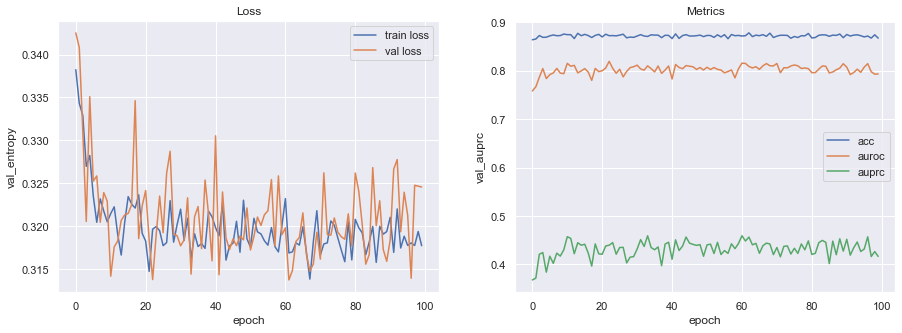

In [10]:
plot_loss("training_logs/k_channel_wise_lstms_stochastic.n8.szc4.0.d0.5.rd0.5.dep1.bs8.ts1.0.csv")

confusion matrix: \
[[2846   16] \
 [ 332   42]] \
entropy = 0.2848693079686964 \
accuracy = 0.8924598097801208 \
precision class 0 = 0.8955317735671997 \
precision class 1 = 0.7241379022598267 \
recall class 0 = 0.9944095015525818 \
recall class 1 = 0.11229946464300156 \
AUC of ROC = 0.8312574505693263 \
AUC of PRC = 0.45326235192515213 \
min(+P, Se) = 0.44533333333333336 \
Epistemic uncertainty = 0.0033708070404827595 \
Aleatoric uncertainty = 0.10026935487985611 \
Uncertainty = 0.10364016145467758

### Concrete dropout

epoch            17.000000
train_entropy     0.254892
val_entropy       0.282398
val_acc           0.887958
val_auroc         0.861811
val_auprc         0.556579
Name: 17, dtype: float64
Select model at epoch 18


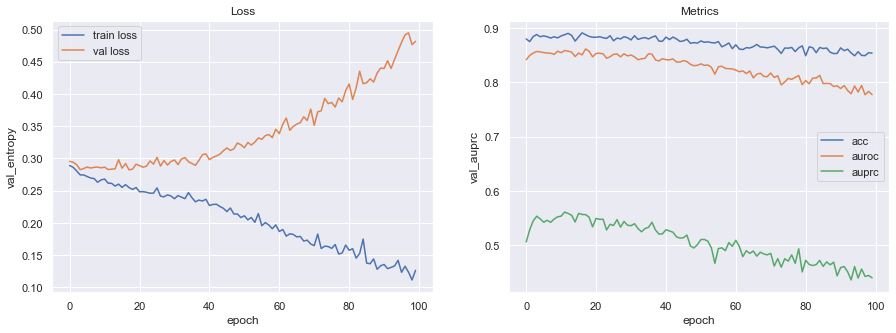

In [11]:
plot_loss("training_logs/k_channel_wise_lstms_stochastic.n8.szc4.0.d1.0.rd1.0.dep1.bs8.ts1.0.csv")

forward_stochastic_lstm_1 dropout = 0.4993559 \
forward_stochastic_lstm_1 recurrent_dropout = 0.49995413 \
backward_stochastic_lstm_1 dropout = 0.499482 \
backward_stochastic_lstm_1 recurrent_dropout = 0.49984017 \
forward_stochastic_lstm_2 dropout = 0.21940382 \
forward_stochastic_lstm_2 recurrent_dropout = 0.44739875 \
backward_stochastic_lstm_2 dropout = 0.49587688 \
backward_stochastic_lstm_2 recurrent_dropout = 0.49994 \
forward_stochastic_lstm_3 dropout = 0.4668335 \
forward_stochastic_lstm_3 recurrent_dropout = 0.4980162 \
backward_stochastic_lstm_3 dropout = 0.2787166 \
backward_stochastic_lstm_3 recurrent_dropout = 0.4812284 \
forward_stochastic_lstm_4 dropout = 0.37632126 \
forward_stochastic_lstm_4 recurrent_dropout = 0.43939343 \
backward_stochastic_lstm_4 dropout = 0.44166172 \
backward_stochastic_lstm_4 recurrent_dropout = 0.49227777 \
forward_stochastic_lstm_5 dropout = 0.37933403 \
forward_stochastic_lstm_5 recurrent_dropout = 0.37534148 \
backward_stochastic_lstm_5 dropout = 0.4395175 \
backward_stochastic_lstm_5 recurrent_dropout = 0.49472752 \
forward_stochastic_lstm_6 dropout = 0.45098007 \
forward_stochastic_lstm_6 recurrent_dropout = 0.4883225 \
backward_stochastic_lstm_6 dropout = 0.45561793 \
backward_stochastic_lstm_6 recurrent_dropout = 0.49128106 \
forward_stochastic_lstm_7 dropout = 0.4527033 \
forward_stochastic_lstm_7 recurrent_dropout = 0.48763752 \
backward_stochastic_lstm_7 dropout = 0.45649382 \
backward_stochastic_lstm_7 recurrent_dropout = 0.49177256 \
forward_stochastic_lstm_8 dropout = 0.20241533 \
forward_stochastic_lstm_8 recurrent_dropout = 0.2884793 \
backward_stochastic_lstm_8 dropout = 0.49948588 \
backward_stochastic_lstm_8 recurrent_dropout = 0.49995837 \
forward_stochastic_lstm_9 dropout = 0.3016544 \
forward_stochastic_lstm_9 recurrent_dropout = 0.47850245 \
backward_stochastic_lstm_9 dropout = 0.31880516 \
backward_stochastic_lstm_9 recurrent_dropout = 0.49646866 \
forward_stochastic_lstm_10 dropout = 0.4981563 \
forward_stochastic_lstm_10 recurrent_dropout = 0.49989474 \
backward_stochastic_lstm_10 dropout = 0.49981815 \
backward_stochastic_lstm_10 recurrent_dropout = 0.49999863 \
forward_stochastic_lstm_11 dropout = 0.49850613 \
forward_stochastic_lstm_11 recurrent_dropout = 0.49989343 \
backward_stochastic_lstm_11 dropout = 0.49844664 \
backward_stochastic_lstm_11 recurrent_dropout = 0.4997425 \
forward_stochastic_lstm_12 dropout = 0.48080933 \
forward_stochastic_lstm_12 recurrent_dropout = 0.4996437 \
backward_stochastic_lstm_12 dropout = 0.49833333 \
backward_stochastic_lstm_12 recurrent_dropout = 0.49986613 \
forward_stochastic_lstm_13 dropout = 0.2541708 \
forward_stochastic_lstm_13 recurrent_dropout = 0.45003676 \
backward_stochastic_lstm_13 dropout = 0.35565072 \
backward_stochastic_lstm_13 recurrent_dropout = 0.49698037 \
forward_stochastic_lstm_14 dropout = 0.2723667 \
forward_stochastic_lstm_14 recurrent_dropout = 0.46284327 \
backward_stochastic_lstm_14 dropout = 0.464014 \
backward_stochastic_lstm_14 recurrent_dropout = 0.49853325 \
forward_stochastic_lstm_15 dropout = 0.2715728 \
forward_stochastic_lstm_15 recurrent_dropout = 0.44703555 \
backward_stochastic_lstm_15 dropout = 0.20230341 \
backward_stochastic_lstm_15 recurrent_dropout = 0.44808516 \
forward_stochastic_lstm_16 dropout = 0.4499828 \
forward_stochastic_lstm_16 recurrent_dropout = 0.4987969 \
backward_stochastic_lstm_16 dropout = 0.442105 \
backward_stochastic_lstm_16 recurrent_dropout = 0.49919787 \
forward_stochastic_lstm_17 dropout = 0.32473496 \
forward_stochastic_lstm_17 recurrent_dropout = 0.449015 \
backward_stochastic_lstm_17 dropout = 0.3625894 \
backward_stochastic_lstm_17 recurrent_dropout = 0.48885313 \
stochastic_lstm_18 dropout = 0.3902311 \
stochastic_lstm_18 recurrent_dropout = 0.38325524

confusion matrix: \
[[2780   82] \
 [ 262  112]] \
entropy = 0.26659640684996977 \
accuracy = 0.8936959505081177 \
precision class 0 = 0.913872480392456 \
precision class 1 = 0.5773195624351501 \
recall class 0 = 0.9713487029075623 \
recall class 1 = 0.29946523904800415 \
AUC of ROC = 0.8513520330945414 \
AUC of PRC = 0.4828176474054224 \
min(+P, Se) = 0.48128342245989303 \
Epistemic uncertainty = 1.224508547986749e-16 \
Aleatoric uncertainty = 0.06752833724021912 \
Uncertainty = 0.06752833724021912

## Partially trained Concrete dropout models

epoch            1.000000
train_entropy    0.287961
val_entropy      0.314882
val_acc          0.871198
val_auroc        0.818369
val_auprc        0.437651
Name: 1, dtype: float64
Select model at epoch 2


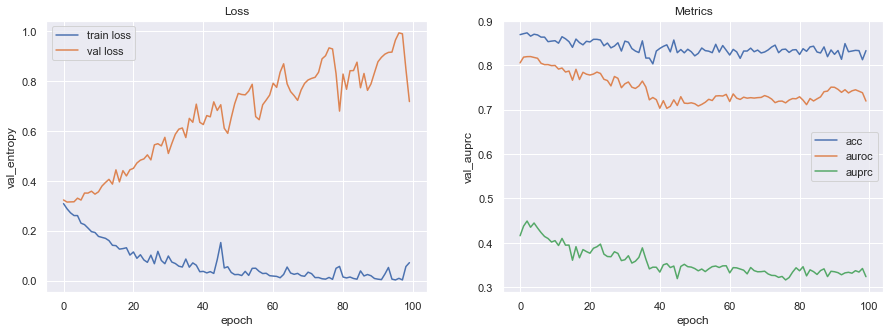

In [12]:
# 10%
plot_loss("training_logs/10_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2776   86] \
 [ 268  106]] \
entropy = 0.2920291135542334 \
accuracy = 0.8906056880950928 \
precision class 0 = 0.9119579792022705 \
precision class 1 = 0.5520833134651184 \
recall class 0 = 0.9699510931968689 \
recall class 1 = 0.28342247009277344 \
AUC of ROC = 0.8128248821922518 \
AUC of PRC = 0.4088156173166141 \
min(+P, Se) = 0.4394736842105263 \
Epistemic uncertainty = 1.496601073982146e-16 \
Aleatoric uncertainty = 0.10054492950439453 \
Uncertainty = 0.10054492950439453

epoch            3.000000
train_entropy    0.272708
val_entropy      0.304968
val_acc          0.879888
val_auroc        0.826152
val_auprc        0.491779
Name: 3, dtype: float64
Select model at epoch 4


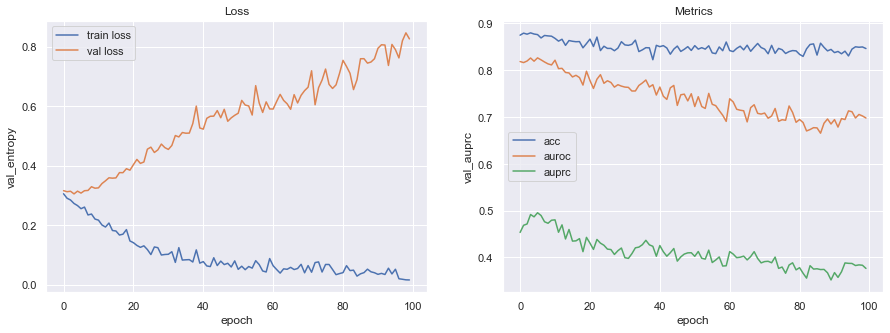

In [13]:
# 20%
plot_loss("training_logs/20_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2793   69] \
 [ 282   92]] \
entropy = 0.283438693209953 \
accuracy = 0.8915327787399292 \
precision class 0 = 0.9082927107810974 \
precision class 1 = 0.5714285969734192 \
recall class 0 = 0.9758909940719604 \
recall class 1 = 0.24598930776119232 \
AUC of ROC = 0.8207705990724858 \
AUC of PRC = 0.42594241498162455 \
min(+P, Se) = 0.45066666666666666 \
Epistemic uncertainty = 1.3384683607103426e-16 \
Aleatoric uncertainty = 0.08349242806434631 \
Uncertainty = 0.08349242806434631

epoch            5.000000
train_entropy    0.254222
val_entropy      0.299835
val_acc          0.882992
val_auroc        0.840104
val_auprc        0.494929
Name: 5, dtype: float64
Select model at epoch 6


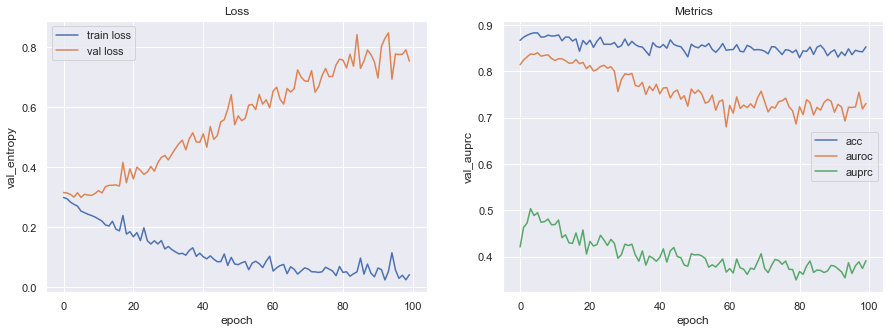

In [14]:
# 30%
plot_loss("training_logs/30_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2759  103] \
 [ 248  126]] \
entropy = 0.28141417386233625 \
accuracy = 0.8915327787399292 \
precision class 0 = 0.9175257682800293 \
precision class 1 = 0.5502183437347412 \
recall class 0 = 0.9640111923217773 \
recall class 1 = 0.3368983864784241 \
AUC of ROC = 0.8322566209636132 \
AUC of PRC = 0.4347774768199827 \
min(+P, Se) = 0.456 \
Epistemic uncertainty = 1.5855566064516905e-16 \
Aleatoric uncertainty = 0.08115082234144211 \
Uncertainty = 0.08115082234144211

epoch            7.000000
train_entropy    0.251331
val_entropy      0.303169
val_acc          0.877095
val_auroc        0.832328
val_auprc        0.488677
Name: 7, dtype: float64
Select model at epoch 8


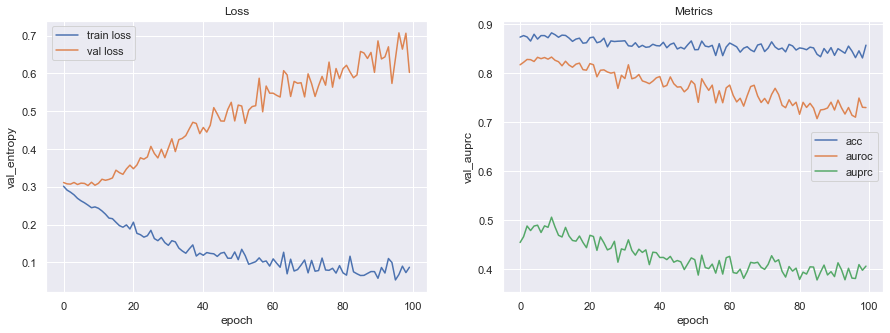

In [15]:
# 40%
plot_loss("training_logs/40_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2781   81] \
 [ 261  113]] \
entropy = 0.2740037741826799 \
accuracy = 0.8943139910697937 \
precision class 0 = 0.9142012000083923 \
precision class 1 = 0.5824742317199707 \
recall class 0 = 0.9716981053352356 \
recall class 1 = 0.3021390438079834 \
AUC of ROC = 0.8355848533428999 \
AUC of PRC = 0.46470194035283685 \
min(+P, Se) = 0.456 \
Epistemic uncertainty = 1.3815872346348128e-16 \
Aleatoric uncertainty = 0.07941998541355133 \
Uncertainty = 0.07941998541355133

epoch            4.000000
train_entropy    0.268595
val_entropy      0.301065
val_acc          0.878647
val_auroc        0.835969
val_auprc        0.515259
Name: 4, dtype: float64
Select model at epoch 5


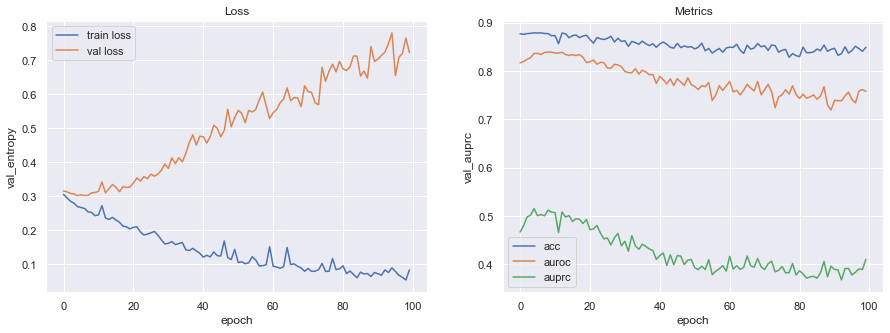

In [16]:
# 50%
plot_loss("training_logs/50_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2732  130] \
 [ 231  143]] \
entropy = 0.2807842969795981 \
accuracy = 0.8884425163269043 \
precision class 0 = 0.9220384955406189 \
precision class 1 = 0.523809552192688 \
recall class 0 = 0.9545772075653076 \
recall class 1 = 0.38235294818878174 \
AUC of ROC = 0.8342610343165282 \
AUC of PRC = 0.4443627261076895 \
min(+P, Se) = 0.45478723404255317 \
Epistemic uncertainty = 1.4553665836675205e-16 \
Aleatoric uncertainty = 0.08477380126714706 \
Uncertainty = 0.08477380126714706

epoch            5.000000
train_entropy    0.270214
val_entropy      0.293394
val_acc          0.877716
val_auroc        0.844109
val_auprc        0.521121
Name: 5, dtype: float64
Select model at epoch 6


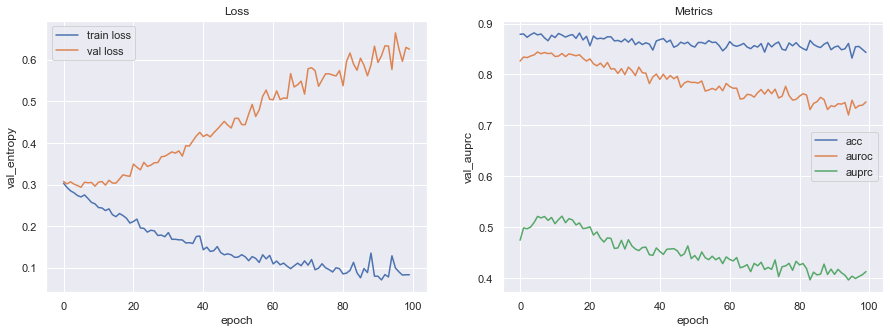

In [17]:
# 60%
plot_loss("training_logs/60_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2788   74] \
 [ 261  113]] \
entropy = 0.26999726006070474 \
accuracy = 0.8964771032333374 \
precision class 0 = 0.9143981337547302 \
precision class 1 = 0.6042780876159668 \
recall class 0 = 0.9741439819335938 \
recall class 1 = 0.3021390438079834 \
AUC of ROC = 0.8413696715583507 \
AUC of PRC = 0.4714416138150711 \
min(+P, Se) = 0.47058823529411764 \
Epistemic uncertainty = 1.3298081105691574e-16 \
Aleatoric uncertainty = 0.08417218923568726 \
Uncertainty = 0.08417218923568726

epoch            11.000000
train_entropy     0.244593
val_entropy       0.297541
val_acc           0.881750
val_auroc         0.839140
val_auprc         0.507605
Name: 11, dtype: float64
Select model at epoch 12


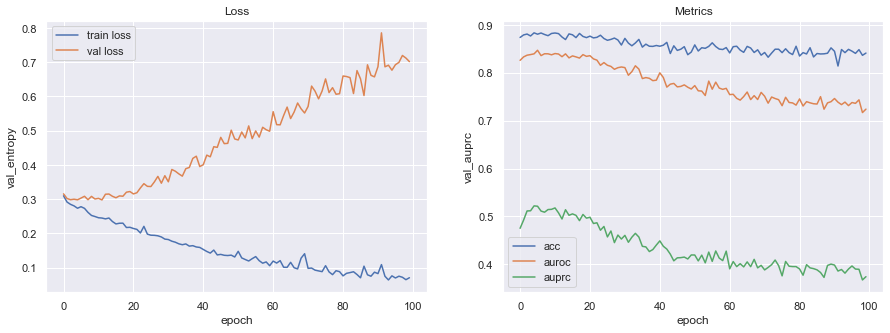

In [18]:
# 70%
plot_loss("training_logs/70_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2772   90] \
 [ 256  118]] \
entropy = 0.27377060950447074 \
accuracy = 0.8930778503417969 \
precision class 0 = 0.9154557585716248 \
precision class 1 = 0.567307710647583 \
recall class 0 = 0.9685534834861755 \
recall class 1 = 0.31550800800323486 \
AUC of ROC = 0.8397842651449754 \
AUC of PRC = 0.4557420128660721 \
min(+P, Se) = 0.44385026737967914 \
Epistemic uncertainty = 1.4853589615386112e-16 \
Aleatoric uncertainty = 0.07878849655389786 \
Uncertainty = 0.07878849655389786

epoch            6.000000
train_entropy    0.252144
val_entropy      0.286933
val_acc          0.886406
val_auroc        0.853747
val_auprc        0.542163
Name: 6, dtype: float64
Select model at epoch 7


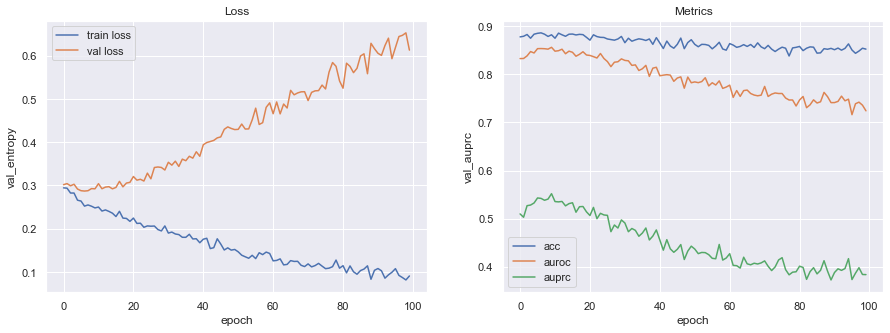

In [19]:
# 80%
plot_loss("training_logs/80_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2768   94] \
 [ 246  128]] \
entropy = 0.26886552206240016 \
accuracy = 0.8949320316314697 \
precision class 0 = 0.9183809161186218 \
precision class 1 = 0.5765765905380249 \
recall class 0 = 0.9671558141708374 \
recall class 1 = 0.34224599599838257 \
AUC of ROC = 0.8462370654379533 \
AUC of PRC = 0.4763527734449501 \
min(+P, Se) = 0.4734042553191489 \
Epistemic uncertainty = 1.563692303802893e-16 \
Aleatoric uncertainty = 0.07790380716323853 \
Uncertainty = 0.07790380716323853

epoch            12.000000
train_entropy     0.243181
val_entropy       0.289014
val_acc           0.882992
val_auroc         0.852081
val_auprc         0.535791
Name: 12, dtype: float64
Select model at epoch 13


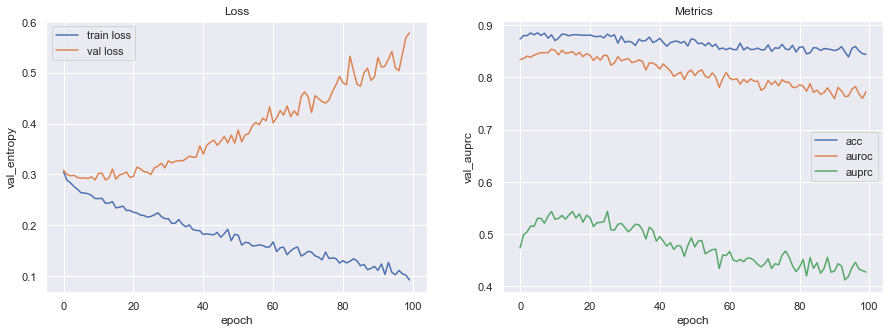

In [20]:
# 90%
plot_loss("training_logs/90_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2761  101] \
 [ 244  130]] \
entropy = 0.26729685846976337 \
accuracy = 0.8933869004249573 \
precision class 0 = 0.91880202293396 \
precision class 1 = 0.5627705454826355 \
recall class 0 = 0.964709997177124 \
recall class 1 = 0.3475935757160187 \
AUC of ROC = 0.8525058203193608 \
AUC of PRC = 0.479296821105611 \
min(+P, Se) = 0.4786096256684492 \
Epistemic uncertainty = 1.405770687023413e-16 \
Aleatoric uncertainty = 0.07743843644857407 \
Uncertainty = 0.07743843644857407

## Partially trained 0.3 dropout models

epoch            26.000000
train_entropy     0.284753
val_entropy       0.320117
val_acc           0.871198
val_auroc         0.806827
val_auprc         0.427062
Name: 26, dtype: float64
Select model at epoch 27


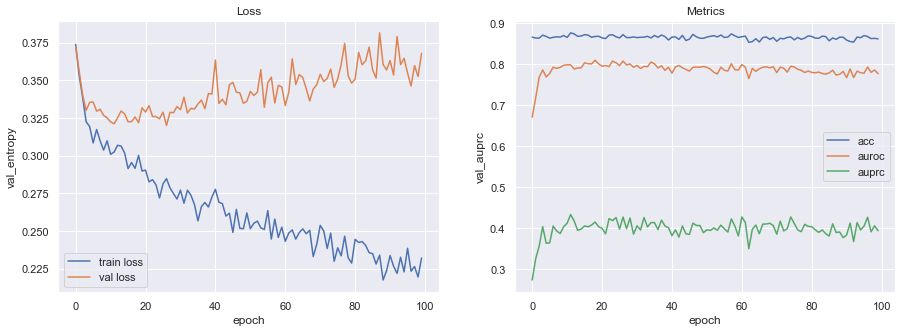

In [21]:
# 10%
plot_loss("training_logs/10_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2795   67] \
 [ 283   91]] \
entropy = 0.28717195540229123 \
accuracy = 0.8918417692184448 \
precision class 0 = 0.9080571532249451 \
precision class 1 = 0.5759493708610535 \
recall class 0 = 0.9765897989273071 \
recall class 1 = 0.24331550300121307 \
AUC of ROC = 0.8161489104885331 \
AUC of PRC = 0.43365722364362824 \
min(+P, Se) = 0.44533333333333336 \
Epistemic uncertainty = 0.004895341116935015 \
Aleatoric uncertainty = 0.09681370109319687 \
Uncertainty = 0.1017090454697609

epoch            36.000000
train_entropy     0.286595
val_entropy       0.307406
val_acc           0.875543
val_auroc         0.824884
val_auprc         0.468557
Name: 36, dtype: float64
Select model at epoch 37


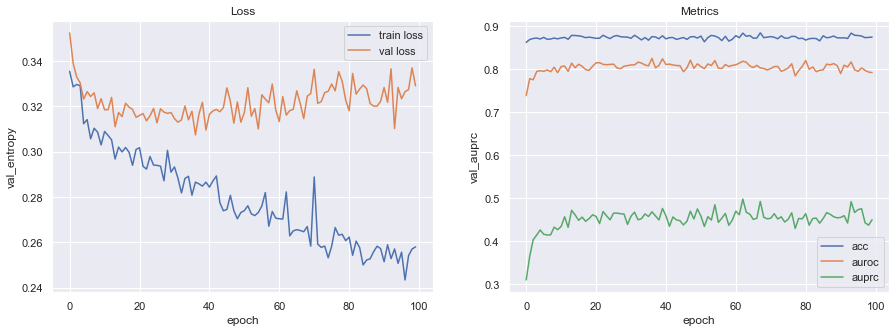

In [22]:
# 20%
plot_loss("training_logs/20_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2807   55] \
 [ 285   89]] \
entropy = 0.2795127298152224 \
accuracy = 0.8949320316314697 \
precision class 0 = 0.9078266620635986 \
precision class 1 = 0.6180555820465088 \
recall class 0 = 0.980782687664032 \
recall class 1 = 0.23796790838241577 \
AUC of ROC = 0.826186392224128 \
AUC of PRC = 0.4417581344827335 \
min(+P, Se) = 0.4625668449197861 \
Epistemic uncertainty = 0.004794477950781584 \
Aleatoric uncertainty = 0.08382467180490494 \
Uncertainty = 0.08861915022134781

epoch            75.000000
train_entropy     0.268244
val_entropy       0.305045
val_acc           0.881440
val_auroc         0.824497
val_auprc         0.504409
Name: 75, dtype: float64
Select model at epoch 76


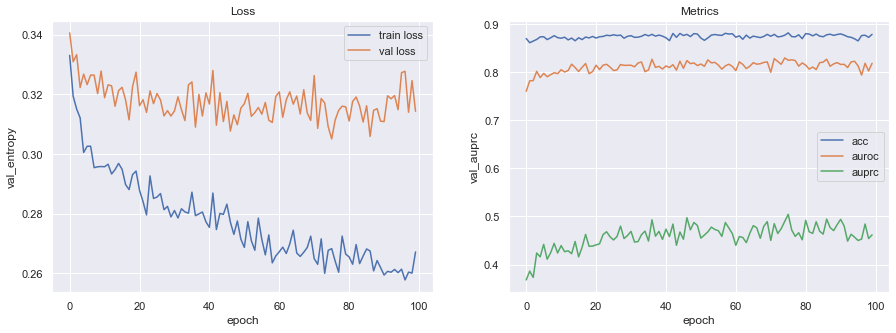

In [23]:
# 30%
plot_loss("training_logs/30_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2824   38] \
 [ 311   63]] \
entropy = 0.27326805993387354 \
accuracy = 0.8921508193016052 \
precision class 0 = 0.900797426700592 \
precision class 1 = 0.6237623691558838 \
recall class 0 = 0.9867225885391235 \
recall class 1 = 0.16844919323921204 \
AUC of ROC = 0.8366704409989648 \
AUC of PRC = 0.4576781813441626 \
min(+P, Se) = 0.46174142480211083 \
Epistemic uncertainty = 0.005054418463259935 \
Aleatoric uncertainty = 0.07458246499300003 \
Uncertainty = 0.07963688671588898

epoch            71.000000
train_entropy     0.284070
val_entropy       0.304423
val_acc           0.878957
val_auroc         0.826987
val_auprc         0.507369
Name: 71, dtype: float64
Select model at epoch 72


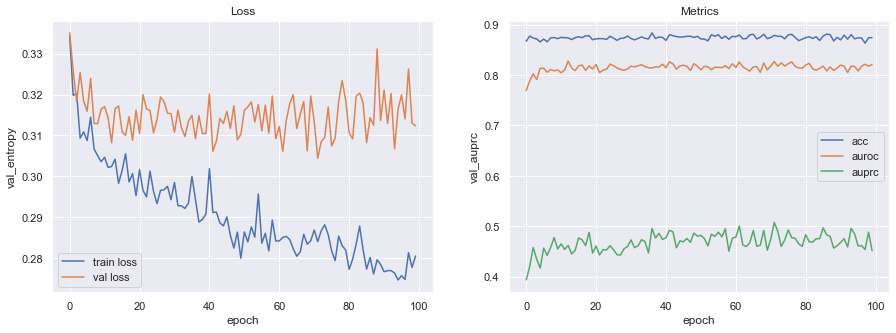

In [24]:
# 40%
plot_loss("training_logs/40_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2796   66] \
 [ 272  102]] \
entropy = 0.2686815440065627 \
accuracy = 0.8955500721931458 \
precision class 0 = 0.9113429188728333 \
precision class 1 = 0.6071428656578064 \
recall class 0 = 0.9769392013549805 \
recall class 1 = 0.27272728085517883 \
AUC of ROC = 0.8433502617742351 \
AUC of PRC = 0.48257905456985556 \
min(+P, Se) = 0.4572192513368984 \
Epistemic uncertainty = 0.004514836706221104 \
Aleatoric uncertainty = 0.08012654632329941 \
Uncertainty = 0.08464138209819794

epoch            37.000000
train_entropy     0.283763
val_entropy       0.301336
val_acc           0.881750
val_auroc         0.829021
val_auprc         0.514721
Name: 37, dtype: float64
Select model at epoch 38


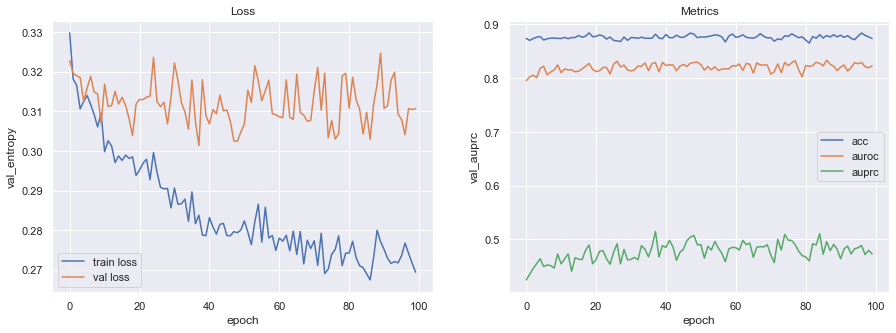

In [25]:
# 50%
plot_loss("training_logs/50_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2818   44] \
 [ 286   88]] \
entropy = 0.2657454639393491 \
accuracy = 0.8980222344398499 \
precision class 0 = 0.9078608155250549 \
precision class 1 = 0.6666666865348816 \
recall class 0 = 0.9846261143684387 \
recall class 1 = 0.23529411852359772 \
AUC of ROC = 0.8499936471634586 \
AUC of PRC = 0.4809269907101225 \
min(+P, Se) = 0.47619047619047616 \
Epistemic uncertainty = 0.004454883746802807 \
Aleatoric uncertainty = 0.08046099543571472 \
Uncertainty = 0.0849158763885498

epoch            98.000000
train_entropy     0.284682
val_entropy       0.297733
val_acc           0.878336
val_auroc         0.841341
val_auprc         0.502043
Name: 98, dtype: float64
Select model at epoch 99


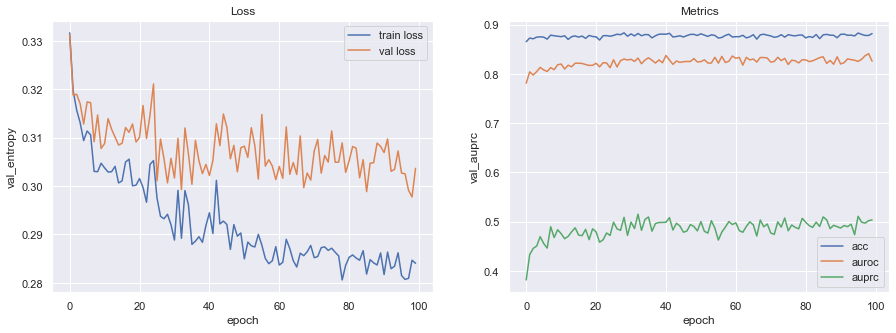

In [26]:
# 60%
plot_loss("training_logs/60_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2806   56] \
 [ 269  105]] \
entropy = 0.26204589944924556 \
accuracy = 0.8995673656463623 \
precision class 0 = 0.9125203490257263 \
precision class 1 = 0.6521739363670349 \
recall class 0 = 0.9804332852363586 \
recall class 1 = 0.2807486653327942 \
AUC of ROC = 0.8551889595174834 \
AUC of PRC = 0.4968004946122992 \
min(+P, Se) = 0.4973404255319149 \
Epistemic uncertainty = 0.005312192253768444 \
Aleatoric uncertainty = 0.07911758869886398 \
Uncertainty = 0.0844297781586647

epoch            56.000000
train_entropy     0.285744
val_entropy       0.295849
val_acc           0.884544
val_auroc         0.840994
val_auprc         0.513689
Name: 56, dtype: float64
Select model at epoch 57


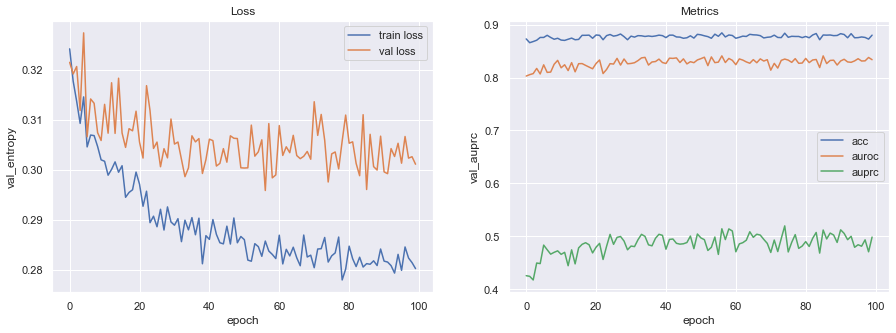

In [27]:
# 70%
plot_loss("training_logs/70_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2837   25] \
 [ 300   74]] \
entropy = 0.2657978631698783 \
accuracy = 0.8995673656463623 \
precision class 0 = 0.904367208480835 \
precision class 1 = 0.747474730014801 \
recall class 0 = 0.991264820098877 \
recall class 1 = 0.1978609561920166 \
AUC of ROC = 0.8504336745180252 \
AUC of PRC = 0.48495447100914135 \
min(+P, Se) = 0.47058823529411764 \
Epistemic uncertainty = 0.003571787616237998 \
Aleatoric uncertainty = 0.08113089948892593 \
Uncertainty = 0.08470268547534943

epoch            32.000000
train_entropy     0.287421
val_entropy       0.295025
val_acc           0.881130
val_auroc         0.840962
val_auprc         0.513824
Name: 32, dtype: float64
Select model at epoch 33


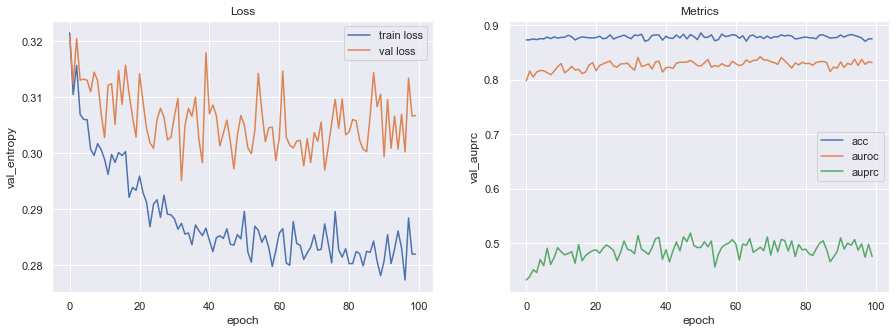

In [28]:
# 80%
plot_loss("training_logs/80_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2805   57] \
 [ 271  103]] \
entropy = 0.2645352790231456 \
accuracy = 0.8986402750015259 \
precision class 0 = 0.9118985533714294 \
precision class 1 = 0.643750011920929 \
recall class 0 = 0.9800838828086853 \
recall class 1 = 0.2754010558128357 \
AUC of ROC = 0.8487950163865814 \
AUC of PRC = 0.4976801926600321 \
min(+P, Se) = 0.48128342245989303 \
Epistemic uncertainty = 0.0040560136549174786 \
Aleatoric uncertainty = 0.07986011356115341 \
Uncertainty = 0.08391612768173218

epoch            81.000000
train_entropy     0.287746
val_entropy       0.293507
val_acc           0.881440
val_auroc         0.842501
val_auprc         0.515725
Name: 81, dtype: float64
Select model at epoch 82


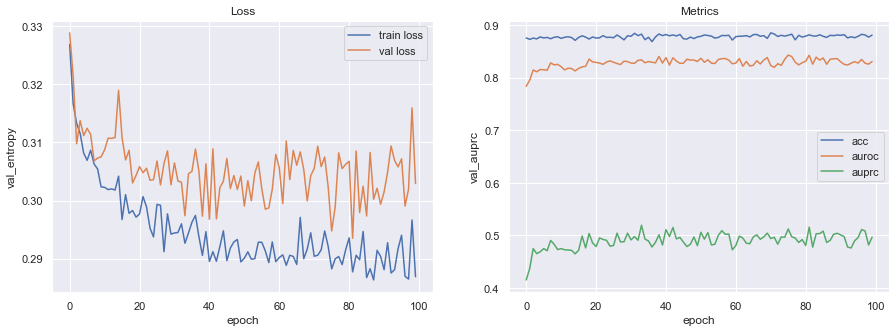

In [29]:
# 90%
plot_loss("training_logs/90_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2810   52] \
 [ 276   98]] \
entropy = 0.2650155505779624 \
accuracy = 0.8986402750015259 \
precision class 0 = 0.9105638265609741 \
precision class 1 = 0.653333306312561 \
recall class 0 = 0.981830894947052 \
recall class 1 = 0.26203209161758423 \
AUC of ROC = 0.85030007810252 \
AUC of PRC = 0.49323300402105547 \
min(+P, Se) = 0.47593582887700536 \
Epistemic uncertainty = 0.0035286336205899715 \
Aleatoric uncertainty = 0.08572190999984741 \
Uncertainty = 0.08925054222345352

## Partially trained 0.5 dropout models

epoch            71.000000
train_entropy     0.303254
val_entropy       0.323281
val_acc           0.871198
val_auroc         0.799237
val_auprc         0.438435
Name: 71, dtype: float64
Select model at epoch 72


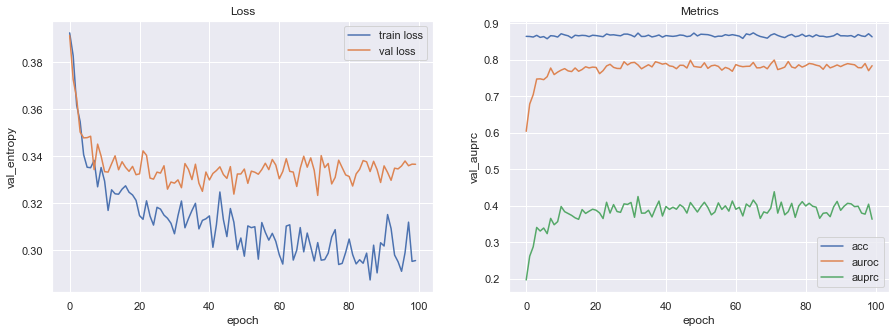

In [30]:
# 10%
plot_loss("training_logs/10_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2804   58] \
 [ 294   80]] \
entropy = 0.28222625281682473 \
accuracy = 0.8912237286567688 \
precision class 0 = 0.9051000475883484 \
precision class 1 = 0.5797101259231567 \
recall class 0 = 0.979734480381012 \
recall class 1 = 0.2139037400484085 \
AUC of ROC = 0.8230305272480632 \
AUC of PRC = 0.4314054966048552 \
min(+P, Se) = 0.44385026737967914 \
Epistemic uncertainty = 0.006357843056321144 \
Aleatoric uncertainty = 0.08186886459589005 \
Uncertainty = 0.08822670578956604

epoch            77.000000
train_entropy     0.309102
val_entropy       0.316238
val_acc           0.873991
val_auroc         0.808531
val_auprc         0.446492
Name: 77, dtype: float64
Select model at epoch 78


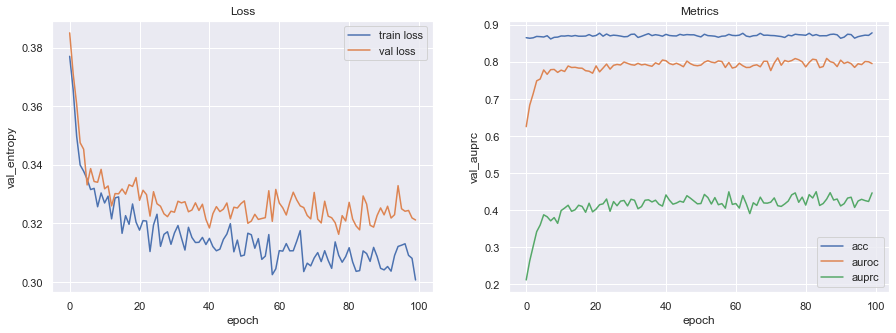

In [31]:
# 20%
plot_loss("training_logs/20_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2853    9] \
 [ 341   33]] \
entropy = 0.28387941433432223 \
accuracy = 0.8918417692184448 \
precision class 0 = 0.893237292766571 \
precision class 1 = 0.7857142686843872 \
recall class 0 = 0.9968553185462952 \
recall class 1 = 0.0882352963089943 \
AUC of ROC = 0.8284528600843807 \
AUC of PRC = 0.4520745297187008 \
min(+P, Se) = 0.4576719576719577 \
Epistemic uncertainty = 0.0045853168703615665 \
Aleatoric uncertainty = 0.0958813950419426 \
Uncertainty = 0.10046671330928802

epoch            81.000000
train_entropy     0.302313
val_entropy       0.314962
val_acc           0.870267
val_auroc         0.811876
val_auprc         0.446083
Name: 81, dtype: float64
Select model at epoch 82


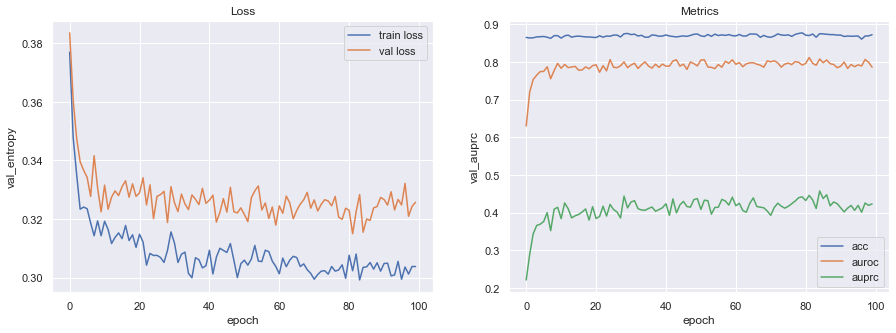

In [32]:
# 30%
plot_loss("training_logs/30_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2815   47] \
 [ 294   80]] \
entropy = 0.28491761374295366 \
accuracy = 0.8946229815483093 \
precision class 0 = 0.9054358601570129 \
precision class 1 = 0.6299212574958801 \
recall class 0 = 0.9835779070854187 \
recall class 1 = 0.2139037400484085 \
AUC of ROC = 0.8238367769444351 \
AUC of PRC = 0.4312715741031843 \
min(+P, Se) = 0.45454545454545453 \
Epistemic uncertainty = 0.005680232774466276 \
Aleatoric uncertainty = 0.09451662003993988 \
Uncertainty = 0.10019685328006744

epoch            91.000000
train_entropy     0.310770
val_entropy       0.316698
val_acc           0.875233
val_auroc         0.809506
val_auprc         0.437916
Name: 91, dtype: float64
Select model at epoch 92


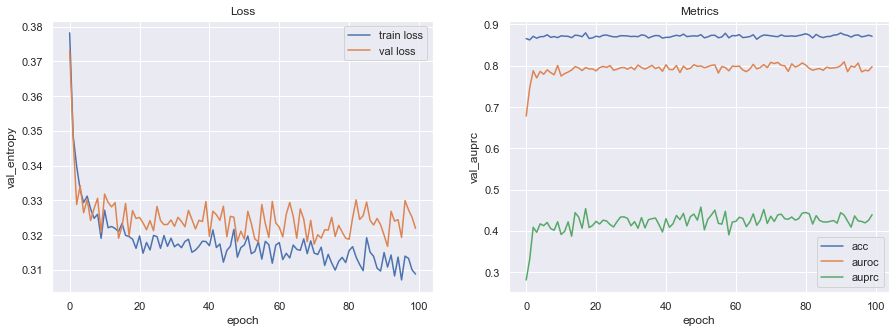

In [33]:
# 40%
plot_loss("training_logs/40_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2837   25] \
 [ 312   62]] \
entropy = 0.2838825870245437 \
accuracy = 0.8958590626716614 \
precision class 0 = 0.9009209275245667 \
precision class 1 = 0.7126436829566956 \
recall class 0 = 0.991264820098877 \
recall class 1 = 0.16577540338039398 \
AUC of ROC = 0.8240871534434242 \
AUC of PRC = 0.45737516782870513 \
min(+P, Se) = 0.44919786096256686 \
Epistemic uncertainty = 0.004432265646755695 \
Aleatoric uncertainty = 0.09550411254167557 \
Uncertainty = 0.09993638098239899

epoch            55.000000
train_entropy     0.314581
val_entropy       0.315731
val_acc           0.872129
val_auroc         0.809716
val_auprc         0.443708
Name: 55, dtype: float64
Select model at epoch 56


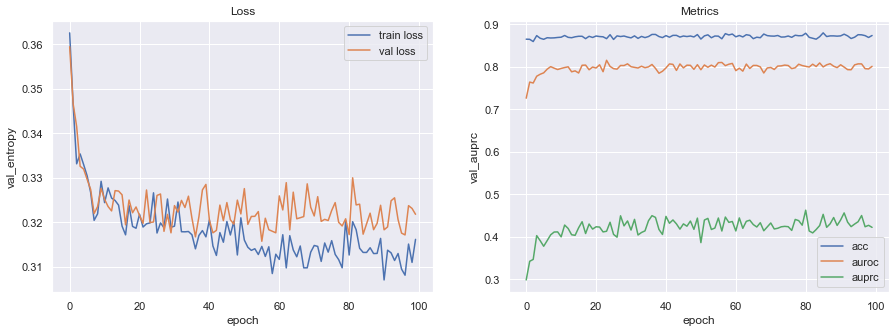

In [34]:
# 50%
plot_loss("training_logs/50_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2833   29] \
 [ 311   63]] \
entropy = 0.28049029195473996 \
accuracy = 0.8949320316314697 \
precision class 0 = 0.9010814428329468 \
precision class 1 = 0.6847826242446899 \
recall class 0 = 0.9898672103881836 \
recall class 1 = 0.16844919323921204 \
AUC of ROC = 0.836583556616853 \
AUC of PRC = 0.4506017631850562 \
min(+P, Se) = 0.4574468085106383 \
Epistemic uncertainty = 0.004676482640206814 \
Aleatoric uncertainty = 0.09692995250225067 \
Uncertainty = 0.10160643607378006

epoch            17.000000
train_entropy     0.321575
val_entropy       0.310559
val_acc           0.872440
val_auroc         0.817657
val_auprc         0.464464
Name: 17, dtype: float64
Select model at epoch 18


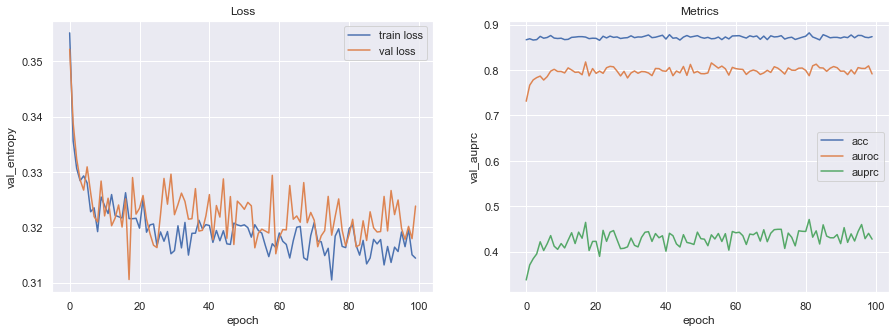

In [35]:
# 60%
plot_loss("training_logs/60_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2835   27] \
 [ 318   56]] \
entropy = 0.28394675217292586 \
accuracy = 0.8933869004249573 \
precision class 0 = 0.8991436958312988 \
precision class 1 = 0.6746987700462341 \
recall class 0 = 0.9905660152435303 \
recall class 1 = 0.14973261952400208 \
AUC of ROC = 0.8249700108745613 \
AUC of PRC = 0.44547170035881306 \
min(+P, Se) = 0.45187165775401067 \
Epistemic uncertainty = 0.004072094336152077 \
Aleatoric uncertainty = 0.09535639733076096 \
Uncertainty = 0.09942848980426788

epoch            91.000000
train_entropy     0.316392
val_entropy       0.310528
val_acc           0.876474
val_auroc         0.815970
val_auprc         0.471605
Name: 91, dtype: float64
Select model at epoch 92


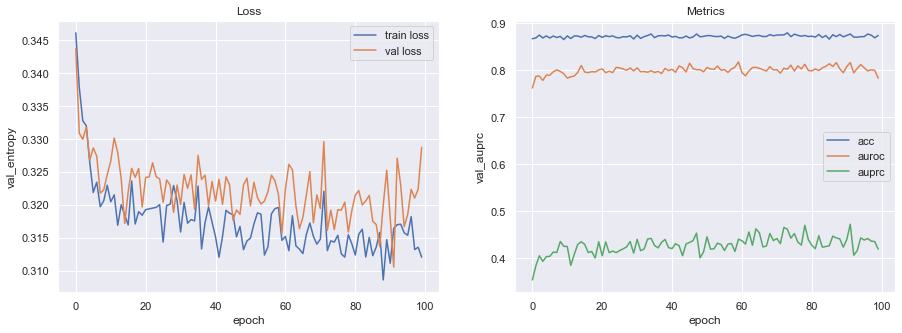

In [36]:
# 70%
plot_loss("training_logs/70_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2842   20] \
 [ 333   41]] \
entropy = 0.2806913235653031 \
accuracy = 0.8909147381782532 \
precision class 0 = 0.8951181173324585 \
precision class 1 = 0.6721311211585999 \
recall class 0 = 0.9930118918418884 \
recall class 1 = 0.1096256673336029 \
AUC of ROC = 0.832149650407142 \
AUC of PRC = 0.4473621283322009 \
min(+P, Se) = 0.45478723404255317 \
Epistemic uncertainty = 0.004261092282831669 \
Aleatoric uncertainty = 0.09190623462200165 \
Uncertainty = 0.09616732597351074

epoch            73.000000
train_entropy     0.311787
val_entropy       0.309752
val_acc           0.873371
val_auroc         0.820712
val_auprc         0.472377
Name: 73, dtype: float64
Select model at epoch 74


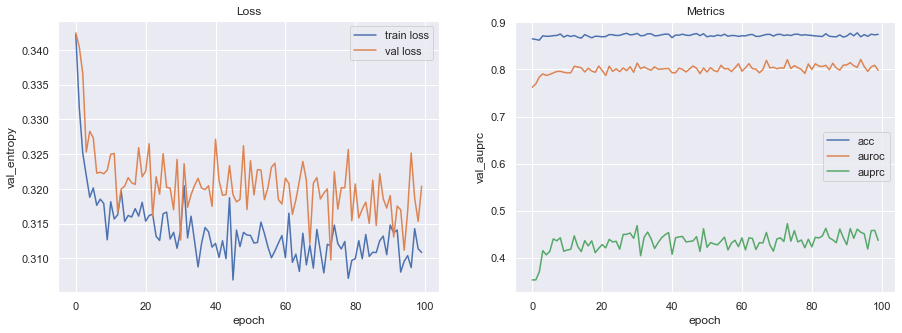

In [37]:
# 80%
plot_loss("training_logs/80_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2858    4] \
 [ 349   25]] \
entropy = 0.2799977662757831 \
accuracy = 0.8909147381782532 \
precision class 0 = 0.8911755681037903 \
precision class 1 = 0.8620689511299133 \
recall class 0 = 0.9986023902893066 \
recall class 1 = 0.06684491783380508 \
AUC of ROC = 0.8287490143760954 \
AUC of PRC = 0.4659977905121569 \
min(+P, Se) = 0.4627659574468085 \
Epistemic uncertainty = 0.0038102141115814447 \
Aleatoric uncertainty = 0.08736537396907806 \
Uncertainty = 0.09117558598518372

epoch            93.000000
train_entropy     0.318201
val_entropy       0.310915
val_acc           0.876474
val_auroc         0.816505
val_auprc         0.475127
Name: 93, dtype: float64
Select model at epoch 94


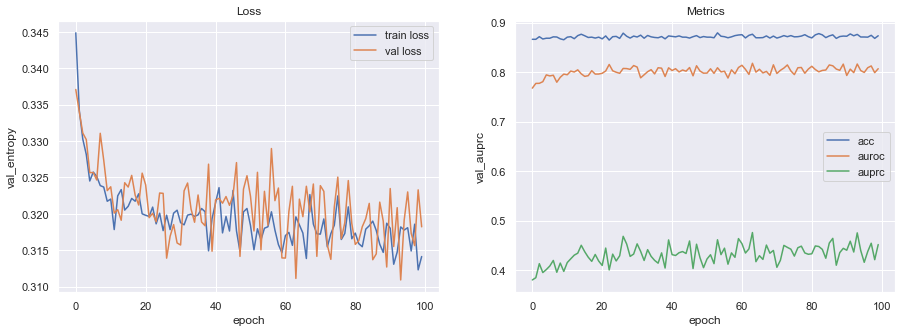

In [38]:
# 90%
plot_loss("training_logs/90_k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2852   10] \
 [ 339   35]] \
entropy = 0.27624900446288353 \
accuracy = 0.8921508193016052 \
precision class 0 = 0.8937637209892273 \
precision class 1 = 0.7777777910232544 \
recall class 0 = 0.9965059161186218 \
recall class 1 = 0.0935828909277916 \
AUC of ROC = 0.8398029499583329 \
AUC of PRC = 0.4801877944150991 \
min(+P, Se) = 0.47593582887700536 \
Epistemic uncertainty = 0.003953641280531883 \
Aleatoric uncertainty = 0.08593284338712692 \
Uncertainty = 0.08988648653030396

## Augmented test data results